In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

%matplotlib inline

In [ ]:
df = pd.read_csv("economic_index.csv")

In [ ]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
#drop unneccessary columns


df.drop(columns = ['Unnamed: 0','year','month'],axis= 1,inplace=True)

In [8]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
##check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

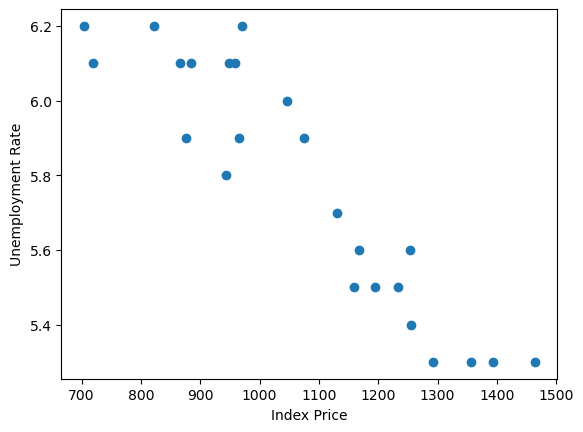

In [ ]:
## Lets do some viualization

pt.scatter(df['index_price'],df['unemployment_rate'])
pt.xlabel('Index Price')
pt.ylabel('Unemployment Rate')
pt.show()


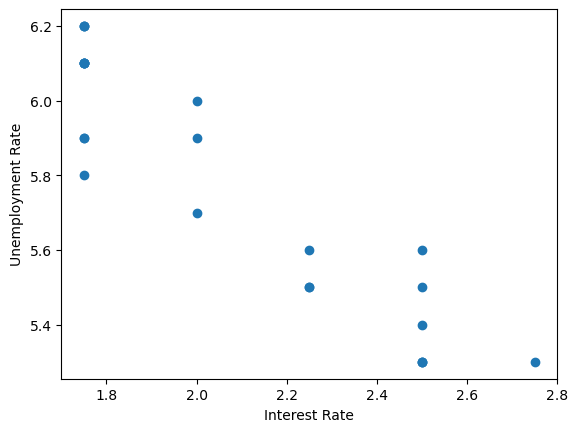

In [12]:
pt.scatter(df['interest_rate'],df['unemployment_rate'])
pt.xlabel('Interest Rate')
pt.ylabel('Unemployment Rate')
pt.show()

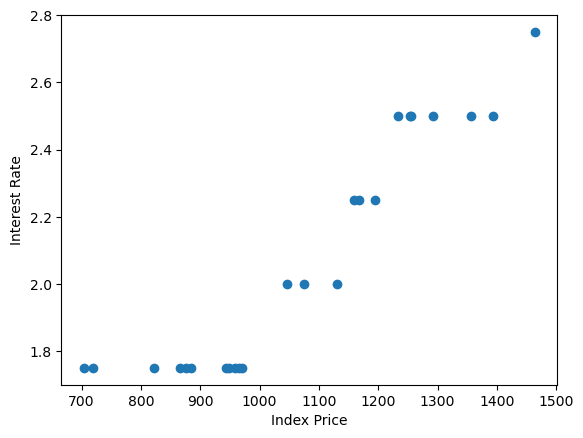

In [14]:
pt.scatter(df['index_price'],df['interest_rate'])
pt.xlabel('Index Price')
pt.ylabel('Interest Rate')
pt.show()

In [73]:

df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [72]:
##independent and dependent features


x = df[['interest_rate','unemployment_rate']]
y = df['index_price']

In [71]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [70]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [74]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

#### here we will predict the linear regression best fit graph line using seaborb

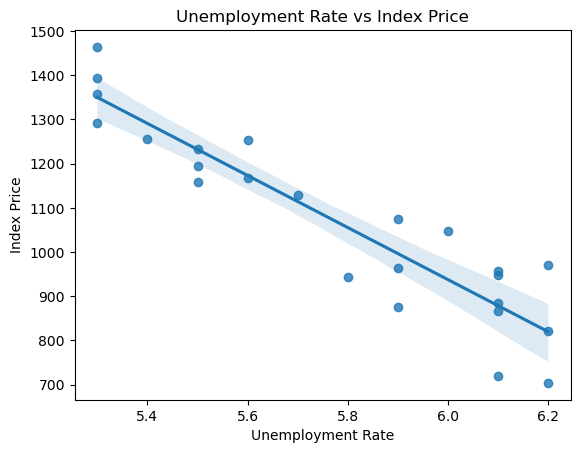

In [75]:
import seaborn as sns
sns.regplot(x=df['unemployment_rate'], y=df['index_price'])

pt.xlabel('Unemployment Rate')  # optional, adds clarity
pt.ylabel('Index Price')        # optional, adds clarity
pt.title('Unemployment Rate vs Index Price')  # optional, looks pro
pt.show()  # ← THIS is what displays the plot in Jupyter

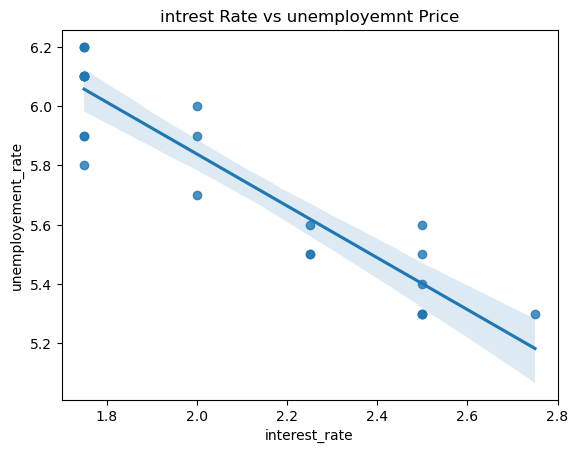

In [76]:
sns.regplot(x = df['interest_rate'],y = df['unemployment_rate'])
pt.xlabel('interest_rate')
pt.ylabel('unemployement_rate')
pt.title('intrest Rate vs unemployemnt Price')
pt.show()

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
y_train = scaler.transform(X_test)

In [79]:
X_train

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [80]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [87]:
print(regression.coef_)

[ 260.33709119 -360.58377051]


#### Here we are performing the cross validation

Cross-validation is a technique used to:

Test your model on multiple different train-test splits to check how well it generalizes.

Instead of training once and testing once (which can be misleading), we shuffle and split the data multiple times, train and test each time, and average the results.

In [81]:
## cross validation

from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,Y_train,scoring = 'neg_mean_squared_error',cv = 3)

In [82]:
np.mean(validation_score)

-5914.82818016239

In [83]:
## prediction
y_pred = regression.predict(X_test)

In [84]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [85]:
## Performance Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712565
59.935781523235505
76.11677139574803


In [ ]:

from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.8278978091457146
0.7131630152428577


## Assumptions

1) if the plot between Y_test and y_pred is a linear line then my model is very good 
2) if by calculating residuals (residuals = Y_test-y_pred) and by plotiing we get a gaussian distribution then its a good ML model
3) if by plotting the scatter plot we are gettijng a scatter plot where residuals are uniformly distributed all over then its a good ml model

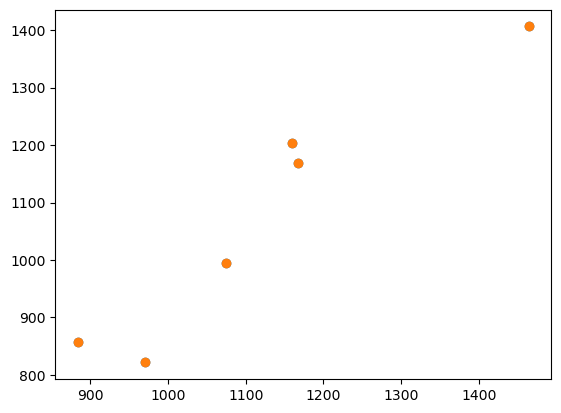

In [49]:
pt.scatter(Y_test,y_pred)
pt.show()

In [64]:
residuals=Y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


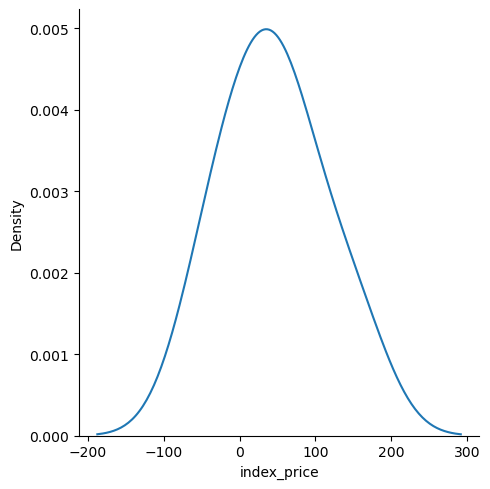

In [65]:
## Plot this residuals
sns.displot(residuals,kind='kde')
pt.show()

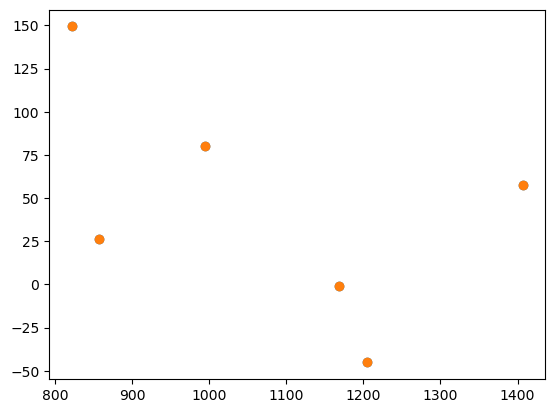

In [67]:
## scatter plot with respect to prediction and residuals
pt.scatter(y_pred,residuals)
pt.show()

In [98]:
## OLS Linear Regression

import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()

In [96]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Sat, 07 Jun 2025   Prob (F-statistic):                    7.46e-19
Time:                        02:59:34   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

d:\Anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [63]:
print(regression.coef_)

[ 260.33709119 -360.58377051]
